In [2]:
%pip install easyocr

Note: you may need to restart the kernel to use updated packages.


In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import os
from tqdm.notebook import tqdm
import pandas as pd

In [2]:
os.environ['KMP_DUPLICATE_LIB_OK']='True' # Fix a problem with easyocr, the kernel dies without this line

In [3]:
import easyocr

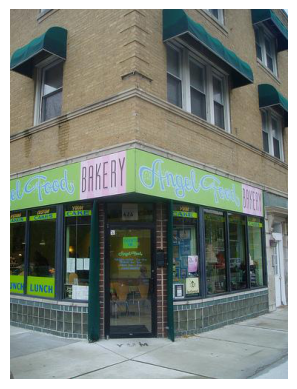

In [6]:
img2testpath = r"C:\Users\Joan\Desktop\Deep_Learning_project\features\data\JPEGImages\n02776631_5387.jpg"
img2test = Image.open(img2testpath).convert('RGB')
plt.imshow(img2test)
plt.axis('off')
plt.show()

In [7]:
detector = easyocr.Reader(['en'])
text_detected = detector.readtext(img2testpath)
for token in text_detected:
    print(token[0])
    print(token[1])
    print(token[2])

[[0, 230], [22, 230], [22, 262], [0, 262]]
el
0.439647719880334
[[25, 371], [61, 371], [61, 387], [25, 387]]
LUNCH
0.29743173713326554
[[81.84612552414679, 206.39992636278166], [161.54565214277008, 193.08374584622885], [168.1538744758532, 243.60007363721834], [87.45434785722992, 256.91625415377115]]
BAHERY
0.36908543952280093
[[172.22726851413617, 191.04996755884855], [324.97927454946927, 228.50172712087755], [309.7727314858638, 279.95003244115145], [157.02072545053073, 242.49827287912245]]
IJ
0.10375955778393449
[[14.00636944292775, 223.4146497187338], [91.98546074077005, 210.98071156002268], [96.99363055707225, 255.5853502812662], [18.01453925922995, 267.0192884399773]]
@recdo|
0.10900725413425967


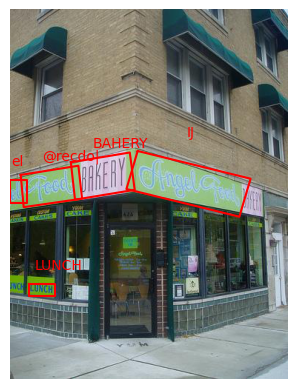

In [8]:
im = Image.open(img2testpath).convert('RGB')

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(im)

# Create a Rectangle patch on the zones where the text is detected
for token in text_detected:
    xs = [x for x,y in token[0]] + [token[0][0][0]]
    ys = [y for x,y in token[0]] + [token[0][0][1]]
    ax.plot(xs, ys, color="red")
    plt.text(((xs[0] + xs[1])/2)-10, ys[0]-20, token[1], color="red")

plt.axis('off')
plt.show()

In [9]:
path_folder = "C:/Users/Joan/Desktop/Deep_Learning_project/features/data/JPEGImages/"
name_imgs = os.listdir(path_folder)
tokens_imgs = {}
for name_img in tqdm(name_imgs):
    text_detected = detector.readtext(path_folder + "/"+ name_img)
    list_text = [token[1] for token in text_detected]
    tokens_imgs[name_img] = list_text

  0%|          | 0/24255 [00:00<?, ?it/s]

In [18]:
tokens_imgs2 ={}
for k,v in tokens_imgs.items():
    tokens_imgs2[k] = [v]
tokens_imgs = tokens_imgs2

In [19]:
df_anotations = pd.DataFrame.from_dict(tokens_imgs, orient='index', columns=['text_detected'])
df_anotations.head()

,text_detected
n02746978_10002.jpg,"[SCHOOL QF, VISUAL&, PERFORMING, ARTS, BRIDGE,..."
n02746978_10031.jpg,"[iS it Arta, welcome, BurpItit, Buf]"
n02746978_10221.jpg,[]
n02746978_10238.jpg,[]
n02746978_10258.jpg,[]


In [20]:
df_anotations.to_pickle("anotations.pkl")